# pip install

In [3]:
# ！pip install gdown 
# !pip install scikit-learn
# !pip install joblib

# Load Raw Data

d:\CODE\STAT7008_Group6b_2024\utilities\data_processor.py:127: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data: pd.DataFrame = pd.read_csv(self.input_path, index_col=0)


processed: False
data shape: (887379, 73)
<class 'pandas.core.frame.DataFrame'>
Index: 887379 entries, 1077501 to 36271262
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    887379 non-null  int64  
 1   loan_amnt                    887379 non-null  float64
 2   funded_amnt                  887379 non-null  float64
 3   funded_amnt_inv              887379 non-null  float64
 4   term                         887379 non-null  object 
 5   int_rate                     887379 non-null  float64
 6   installment                  887379 non-null  float64
 7   grade                        887379 non-null  object 
 8   sub_grade                    887379 non-null  object 
 9   emp_title                    835917 non-null  object 
 10  emp_length                   842554 non-null  object 
 11  home_ownership               887379 non-null  object 
 12  annual_inc   

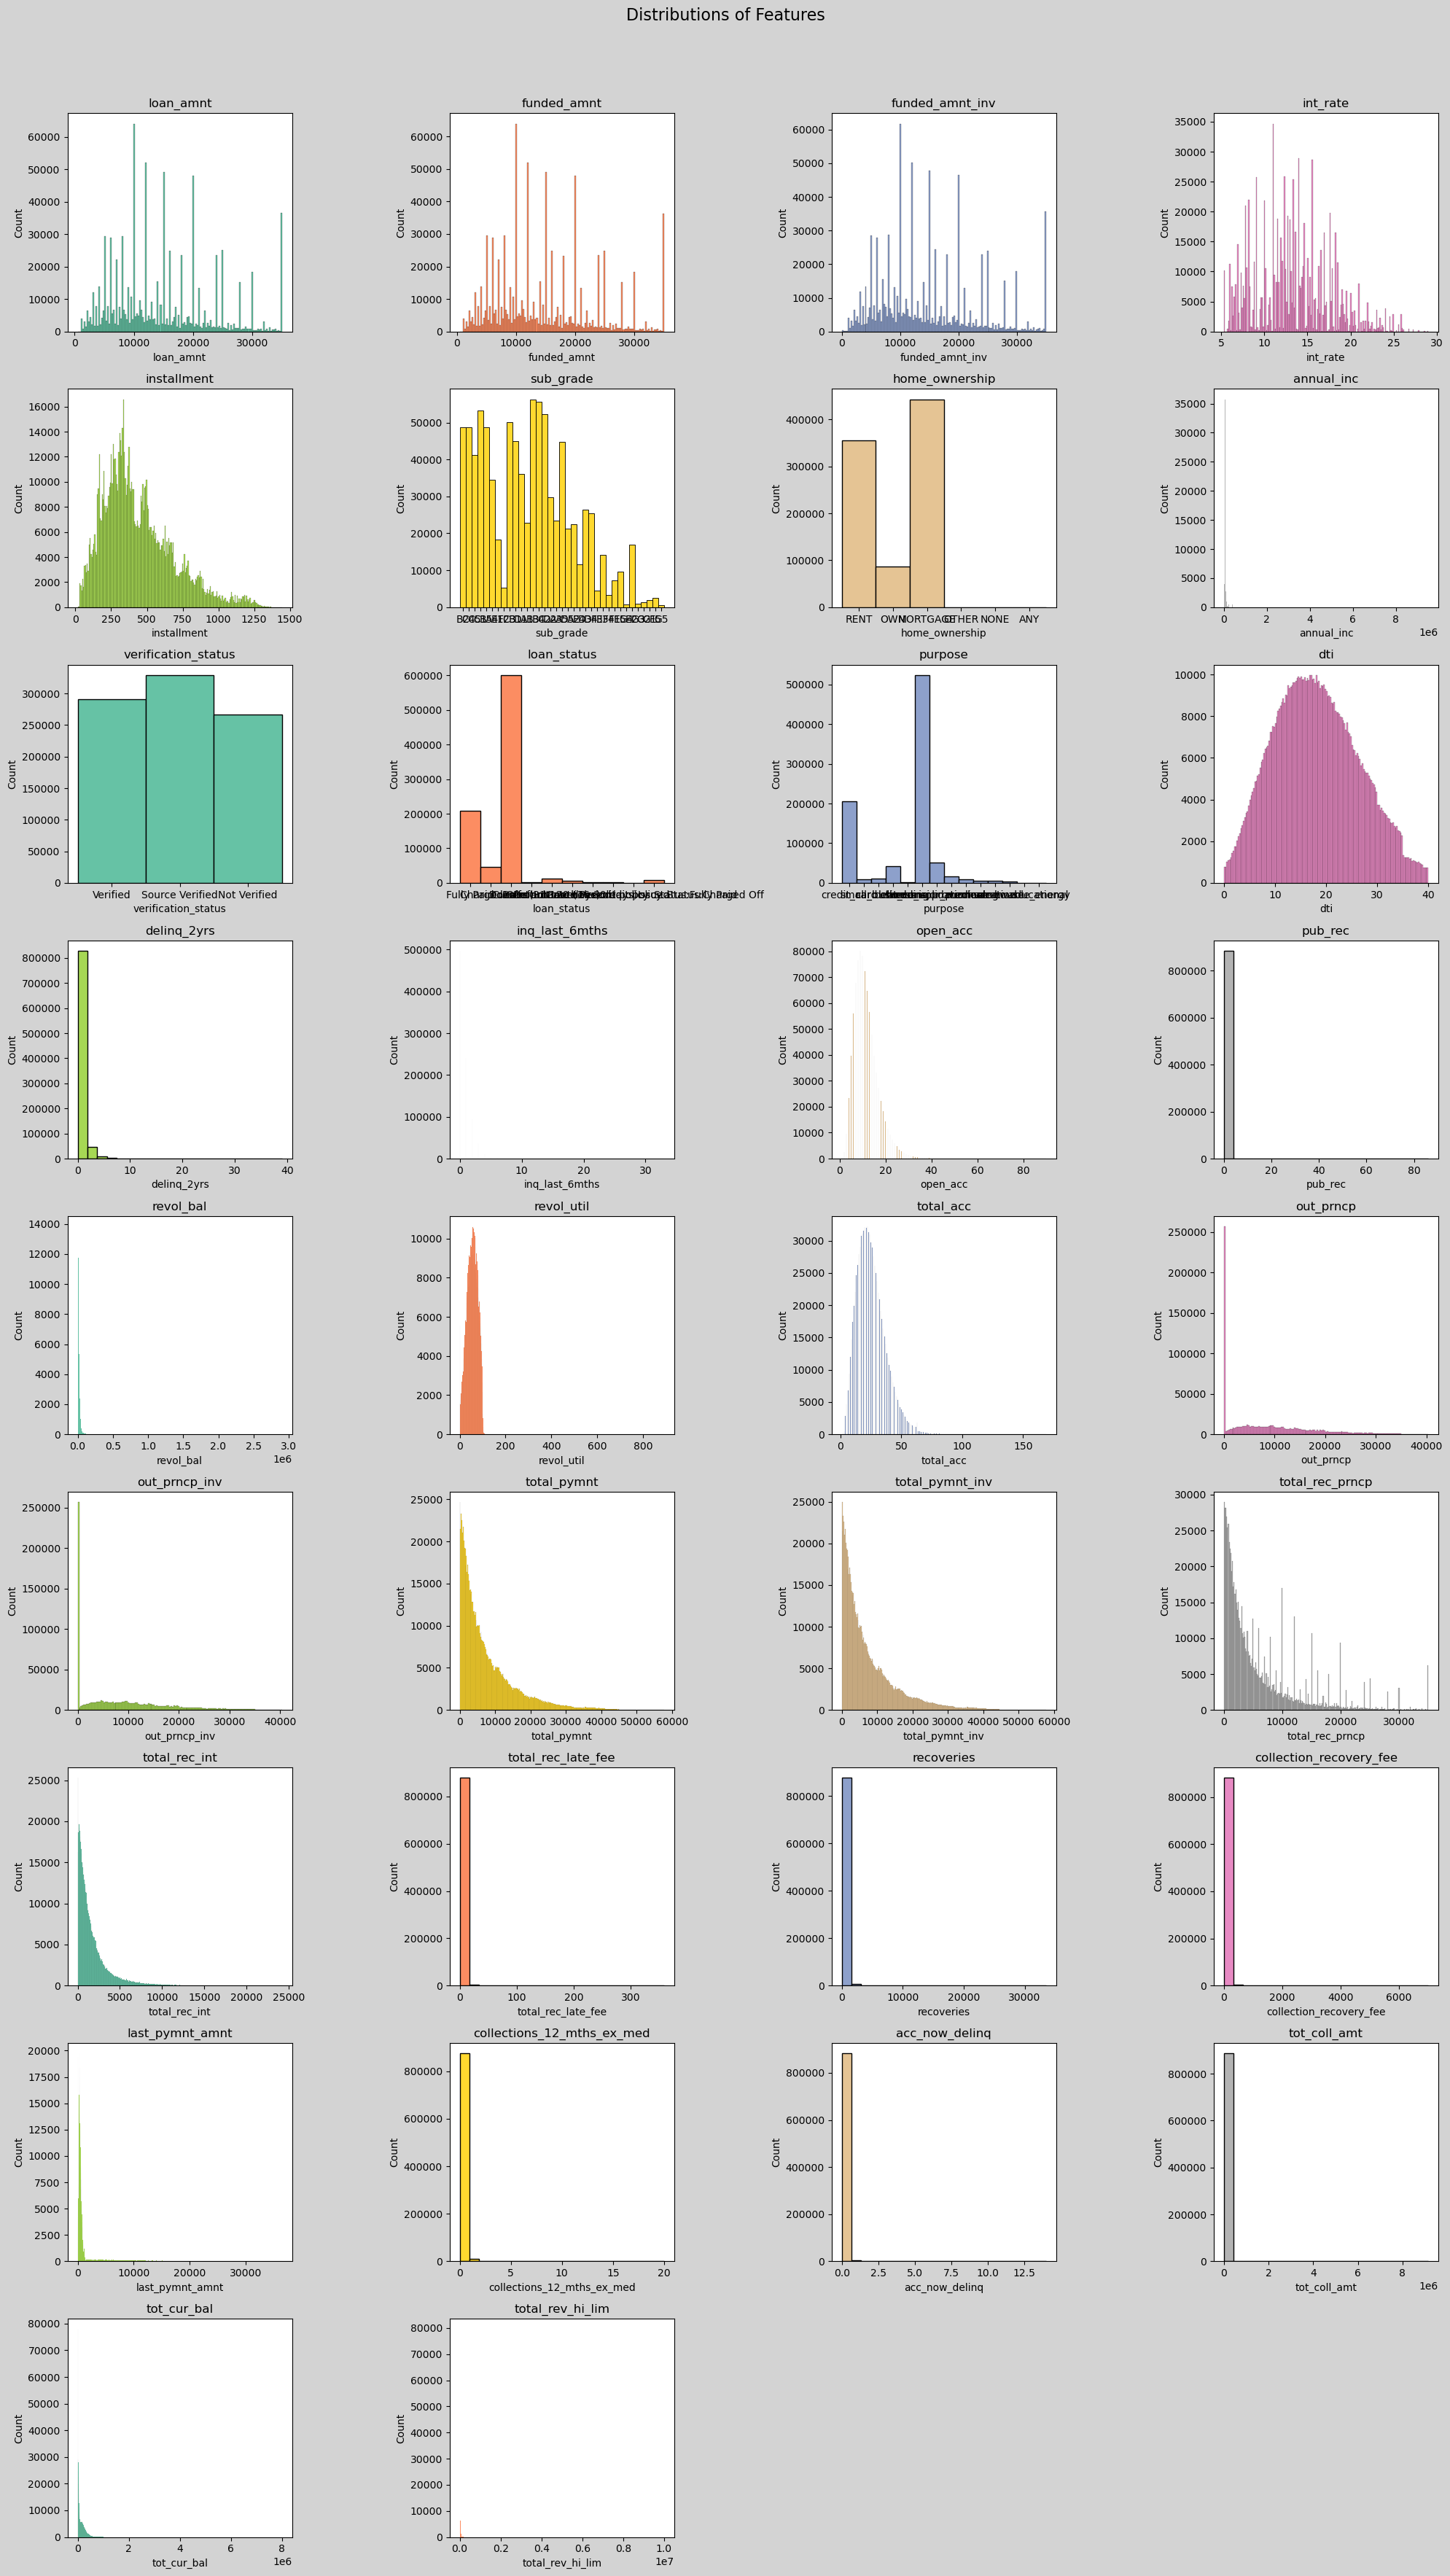

In [2]:
from utilities import DataPreProcessor

dpp = DataPreProcessor()

# Load the data
dpp.load_data(download=True)

# show the row data info
dpp.show_data_info()

# preprocess the data
dpp.preprocess_data(fill_blank=True, fill_mode='mode')

# show the preprocessed data info
dpp.show_data_info()

# plt the remaining features
dpp.show_feature_plt()

# DataLoader

In [2]:
from utilities import DataLoader, maxmin_scaler

dl = DataLoader(dpp.get_data())

dl.encoder()

dl.split_data(MAXMIN=True)

dl.data_filter(mode='random')

x_train_filtered, x_test_filtered, y_train, y_test = dl.get_filtered_data()

In [9]:
print(x_train_filtered.shape, x_test_filtered.shape, y_train.shape, y_test.shape)
print(x_train_filtered.isna().sum().sum(), x_test_filtered.isna().sum().sum())

(62038, 15) (26588, 15) (62038,) (26588,)
0 0


In [7]:
x_train_filtered.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal
0,0.647059,0.647059,0.648094,1.0,0.109421,0.310863,0.882353,0.012320,0.0,0.131033,0.0,0.125,0.112360,0.000000,0.004008
1,0.411765,0.411765,0.413490,1.0,0.294466,0.219807,0.705882,0.009161,0.0,0.387097,0.0,0.125,0.179775,0.011628,0.003543
2,1.000000,1.000000,1.000000,1.0,0.640896,0.642385,0.323529,0.009161,1.0,0.297824,0.0,0.125,0.123596,0.000000,0.005477
